In [1123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('seaborn')

In [1122]:
# Forward Selection
def GLS(X, y,summary = False,OLS = False):
    X_with_const = sm.add_constant(X)
    if OLS:
        lin_reg = sm.OLS(y,X_with_const)
    else:
        lin_reg = sm.GLS(y,X_with_const)
    res = lin_reg.fit()
    X_const = sm.add_constant(X_with_const)
    y_pred = res.predict(X_with_const)
    residual = np.subtract(np.array(y), np.array(y_pred).reshape(y.shape[0],-1))
    if summary:
        return res.summary()
    return res.aic,res.rsquared_adj

In [1130]:
dataset = pd.read_csv("qsar_fish_toxicity.csv",header = None)
dataset = dataset.rename(columns = {0:'CIC0',1:'SM1_Dz(Z)',2:'GATS1i ',3:'NdsCH', 4:'NdssC' ,5:'MLOGP',6:'LC50'})
#dataset = dataset.drop(['CIC0',2],axis = 1)
#dataset = dataset[(dataset['EcoliAve_CFU'] > 0)] 
X =  dataset.iloc[:,0:6]
y =  dataset.iloc[:,6:7]
dataset.dropnaescribe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


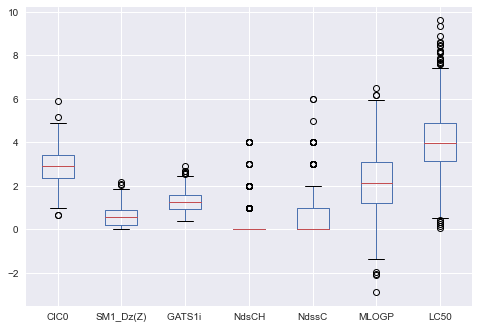

In [1082]:
dataset.boxplot()
plt.savefig("Boxplots.png")

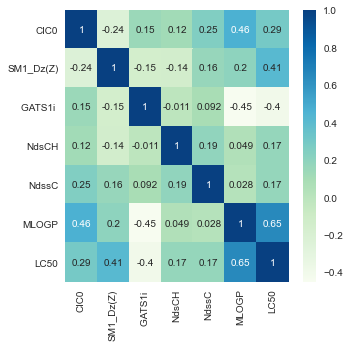

In [1083]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(dataset.corr(),annot=True,cmap='GnBu',)
plt.savefig("Corelation matrix.png")

In [1084]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = dataset.iloc[:,0:6]
vif["Features"] = x.columns
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF Factor
0,CIC0,25.598575
1,SM1_Dz(Z),3.464257
2,GATS1i,14.480146
3,NdsCH,1.220603
4,NdssC,1.544874
5,MLOGP,7.428264


In [1087]:
GLS(x,y,True,True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.33e-164
Time:                        01:58:31   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1746      0.181     12.000      0.000       1.819       2.530
CIC0           0.3856      0.061      6.333      0.000       0.266       0.505
SM1_Dz(Z)      1.2556      0.087     14.430      0.000       1.085       1.426
GATS1i        -0.7464      0.101     -7.365      0.000      -0.945      -0.548
NdsCH          0.4136      0.054      7.644      0.000       0.307       0.520
NdssC          0.0643      0.041      1.583      0.114      -0.015       0.144
MLOGP          0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checks for Normality

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


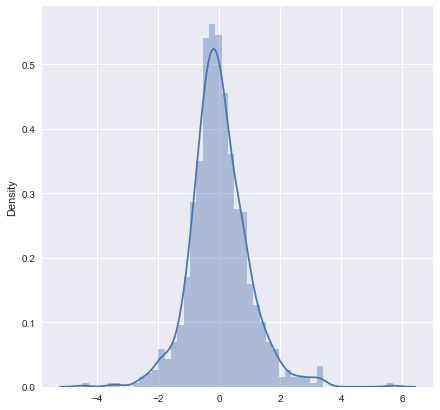

In [1125]:
plt.figure(figsize = (7,7))
sns.distplot(res.resid)

plt.savefig("Residual Distribution")

In [1126]:
residual =residual.reshape(-1)
residual[0:5]

array([-0.08270344, -0.51359253, -0.16962376, -0.26711576,  1.27581586])

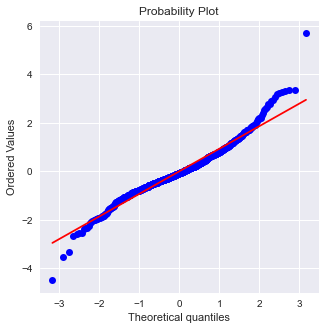

In [1103]:
fig, ax = plt.subplots(figsize=(5,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
plt.savefig("QQPlot.png")

In [1141]:
from scipy.stats import kstest,anderson,normaltest
anderson(res.resid,'norm').critical_values[0]

0.573

# Autocorrelation Test

<ipython-input-1108-fec9ce7cbdd0>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


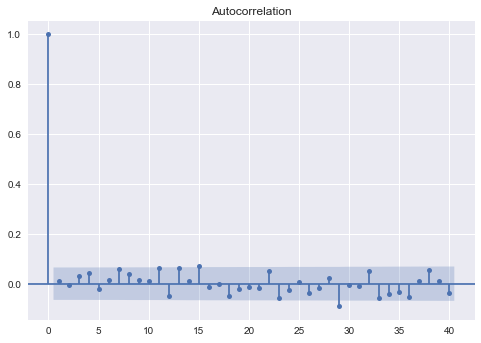

In [1108]:
acf = smt.graphics.plot_acf(res.resid, lags=40 , alpha=0.05)
acf.show()
plt.savefig("Autocorrelation")

In [1109]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res.resid)

1.9785048067212314

# Homoscadacity 

p-value: 0.9999917829650863


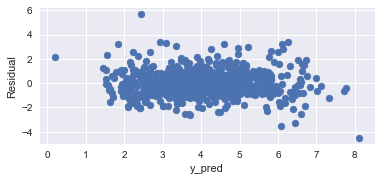

In [1110]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)
ax.set_xlabel('y_pred')
ax.set_ylabel("Residual")
gq_test = sm.stats.het_goldfeldquandt(res.resid,res.model.exog)
pq_test = sm.stats.het_breuschpagan(res.resid,res.model.exog)
print("p-value:",gq_test[1])
plt.savefig("Homo test.png")

# Forward Selection 

In [1111]:
aic = []
rsq_adj = []

for i in range(4):
    v1, v2 = GLS(X.iloc[:, [i]], y)
    aic.append(v1)
    rsq_adj.append(v2)

    
for i in range(4):
    for j in range(i,4):
        if i!=j:
            v1, v2 = GLS(X.iloc[:, [i, j]], y)
            aic.append(v1)
            rsq_adj.append(v2)

for i in range(4):
    for j in range(i,4):
        for k in range(j, 4):
            if i!=j and j!=k:
                v1, v2 = GLS(X.iloc[:, [i, j]], y)
                aic.append(v1)
                rsq_adj.append(v2)

v1, v2 = GLS(X, y)
aic.append(v1)
rsq_adj.append(v2)


0.5743477868592759

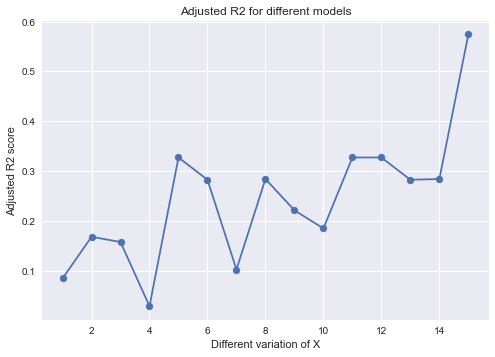

In [1142]:
plt.plot(range(1,16),rsq_adj)
plt.scatter(range(1,16), rsq_adj)
plt.xlabel("Different variation of X")
plt.ylabel("Adjusted R2 score")
plt.title("Adjusted R2 for different models") 
plt.savefig("Adjusted R2")
max(rsq_adj)

2490.095036259056

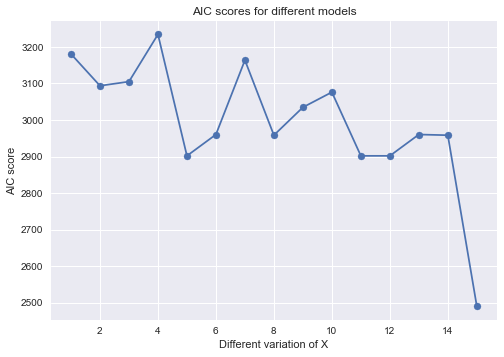

In [1144]:
plt.plot(range(1,16),aic)
plt.scatter(range(1,16), aic)
plt.xlabel("Different variation of X")
plt.ylabel("AIC score")
plt.title("AIC scores for different models")
plt.savefig("AIC score")
min(aic)